In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.0/973.0 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [4]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("irfanworskspace").project("football_field_keypoint_detection")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football_Field_KeyPoint_Detection-1 in yolov8:: 100%|██████████| 646/646 [00:00<00:00, 2989.31it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

In [7]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=48 epochs=520 imgsz=640 mosaic=0.0 plots=True

/content
100% 133M/133M [00:01<00:00, 136MB/s]
Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=/content/datasets/Football_Field_KeyPoint_Detection-1/data.yaml, epochs=520, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

In [8]:
!ls {HOME}/runs/pose/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    PoseF1_curve.png  train_batch3060.jpg
BoxP_curve.png					    PoseP_curve.png   train_batch3061.jpg
BoxPR_curve.png					    PosePR_curve.png  train_batch3062.jpg
BoxR_curve.png					    PoseR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       weights
events.out.tfevents.1744299522.c8a9b56164df.3702.0  train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg


/content


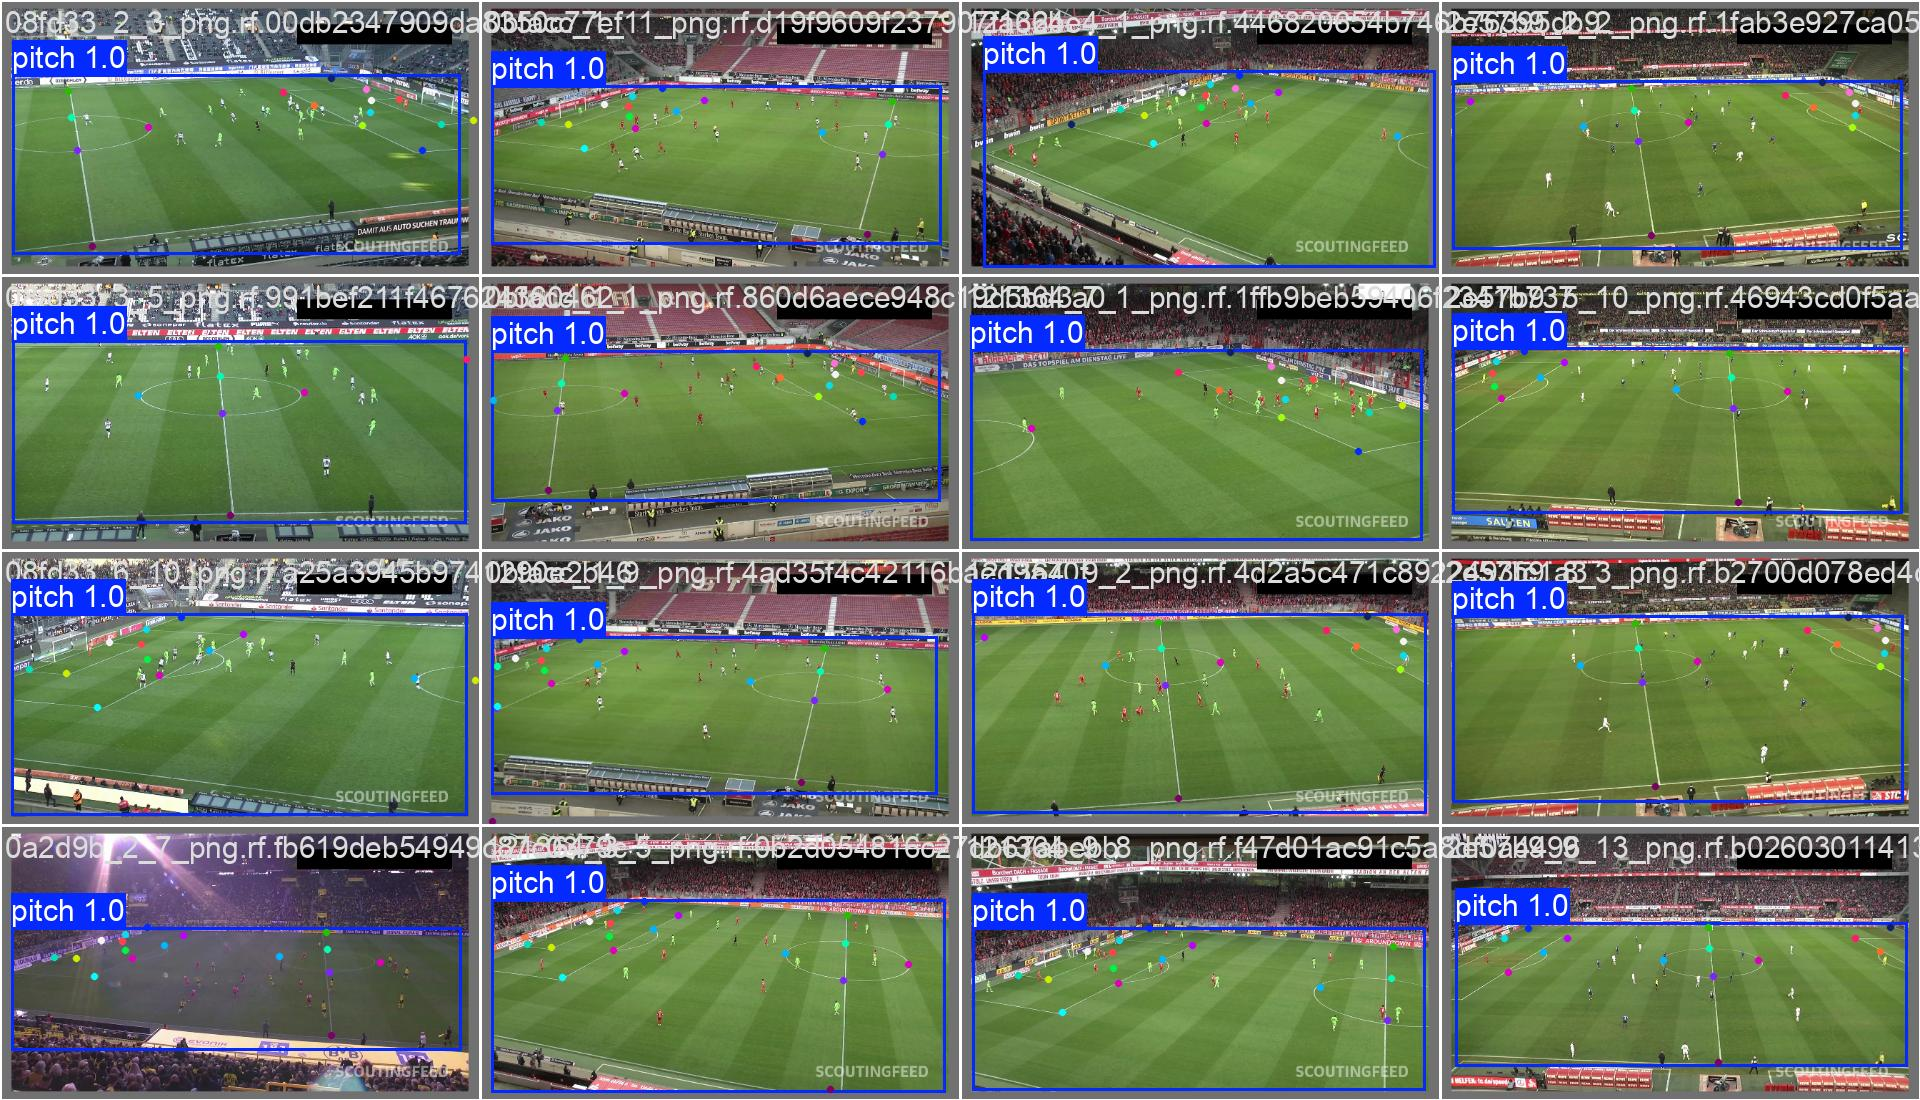

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8x-pose summary (fused): 121 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
val: Scanning /content/datasets/Football_Field_KeyPoint_Detection-1/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  2.76it/s]
                   all         34         34          1          1      0.995      0.994          1          1      0.995      0.962
Speed: 2.3ms preprocess, 8.3ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/pose/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
project.version(dataset.version).deploy(model_type="yolov8-pose", model_path=f"{HOME}/runs/pose/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.106, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/irfanworskspace/football_field_keypoint_detection/1
Share your model with the world at: https://universe.roboflow.com/irfanworskspace/football_field_keypoint_detection/model/1


##GIT

>These commands are only for pushing this notebook to **my GitHub repo**.  

In [ ]:
!apt-get install git -y

In [ ]:
!git config --global user.email "irfanhamid19@gmail.com"
!git config --global user.name "Irfan-Hamid"

In [ ]:
from google.colab import userdata

GITHUB_KEY = userdata.get('GITHUB_KEY')
repo_url = f"https://{GITHUB_KEY}@github.com/Irfan-Hamid/DeepLearning_Football.git"

%cd /content
!git clone {repo_url}

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Train_KeyPoint_Detector_YOLO.ipynb" "/content/DeepLearning_Football/"

In [ ]:
%cd /content/DeepLearning_Football

!git add Train_KeyPoint_Detector_YOLO.ipynb
!git commit -m "Commit2"
!git push origin main